# EJERC 2 - PRIMER PARCIAL SIS420 

# Regresión Lineal Multivariable

## Implementacion del modelo de regresion lineal multivariable para realizar predicciones.

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir el numero de instalaciones de Aplicaciones de Google Play Store.

En el siguiente dataset `googleplaystore` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps/data

Enlace del GitHub:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Información del Dataset


### Aplicaciones de Google Play Store

Datos extraídos de la web de 10 mil aplicaciones de Play Store para analizar el mercado de Android.


### Acerca del conjunto de datos

#### Contexto

Si bien muchos conjuntos de datos públicos (en Kaggle y similares) proporcionan datos de Apple App Store, no hay muchos conjuntos de datos homólogos disponibles para las aplicaciones de Google Play Store en ningún lugar de la web. Al indagar más a fondo, descubrí que la página de la App Store de iTunes despliega una estructura similar a un apéndice muy bien indexada para permitir un raspado web simple y fácil. Por otro lado, Google Play Store utiliza técnicas sofisticadas de hoy en día (como la carga dinámica de páginas) utilizando JQuery, lo que hace que el raspado sea más desafiante.

#### Contenido

Cada aplicación (fila) tiene valores para la categoría, la clasificación, el tamaño, etc.

#### Agradecimientos

Esta información se extrae de Google Play Store. La información de esta aplicación no estaría disponible sin ella.

#### Inspiración

Los datos de las aplicaciones de Play Store tienen un enorme potencial para impulsar el éxito de las empresas de creación de aplicaciones. Se puede obtener información procesable para que los desarrolladores trabajen y capturen el mercado de Android.



## Caracteristicas

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver

Donde el objetivo es predecir la cantidad de instalaciones de la aplicacion

- App

- Categoría de aplicación

- Reseñas Tamaño 

- Instalaciones

- Tipo

- Precio

- Calificación de contenido

- Géneros

- Última actualización

- Ver_actual

- Android_Ve

In [2]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split


#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime


from sklearn.preprocessing import PolynomialFeatures as Poly

In [3]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
data = pd.read_csv('./googleplaystore.csv', delimiter=',')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## PROCESAMIENTO DE LOS DATOS

In [4]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes que podrian tener las columnas X
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

DATOS VACIOS
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Insta

In [5]:
# Eliminamos columnas que no aportan en los calculos de las predicciones
data.drop(['Rating'], axis=1, inplace=True)

Convertimos las columnas de string a numeros

In [6]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns


#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
  
  
  
#Fechas a numeros aunque no se utiliza en este caso
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [7]:
data

,App,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,6963,1,1182,54,7,1,91,1,9,561,118,15
1,2632,1,5923,28,19,1,91,1,12,481,1018,15
2,8657,1,5680,367,14,1,91,1,9,116,464,15
3,7828,1,1946,100,17,1,91,4,9,824,2765,18
4,7023,1,5923,63,10,1,91,1,11,756,277,20
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8174,12,3471,239,13,1,91,1,39,645,638,17
10837,4609,12,3588,124,9,1,91,1,39,691,113,17
10838,6892,21,2854,413,3,1,91,1,72,505,113,7
10839,8395,4,355,461,3,1,91,3,19,496,2765,32


In [8]:
# Vemos si existen datos vacios
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64


In [9]:
# Verificamos de nuevos los datos 
print('INFORMACION DE TIPO DE DATOS')
data.info()

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   App             10841 non-null  int32
 1   Category        10841 non-null  int32
 2   Reviews         10841 non-null  int32
 3   Size            10841 non-null  int32
 4   Installs        10841 non-null  int32
 5   Type            10841 non-null  int32
 6   Price           10841 non-null  int32
 7   Content_Rating  10841 non-null  int32
 8   Genres          10841 non-null  int32
 9   Last_Updated    10841 non-null  int32
 10  Current_Ver     10841 non-null  int32
 11  Android_Ver     10841 non-null  int32
dtypes: int32(12)
memory usage: 508.3 KB


Como nuestro objetivo es calcular las instalaciones de cada app donde segun los datos de informacion van de 50000 a 100000 instalaciones
en ese caso introducimos valores de ese rango a la columna de Y en install

In [10]:
# Introducimos valores 
data['Installs'] = np.random.randint(20000, 40000, size=len(data))
data['Type'] = np.random.randint(1, 50, size=len(data))
data['Price'] = np.random.randint(10000, 15000, size=len(data))
data['Android_Ver'] = np.random.randint(8, 15, size=len(data))
data['Content_Rating'] = np.random.randint(1, 10, size=len(data))

In [11]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "Intalls"
indice_columna = data.columns.get_loc('Installs')
columnas = list(data.columns)
columnas.pop(indice_columna)
columnas.append('Installs')
data = data[columnas]

# Mostramos los datos Procesados
data

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs
0,6963,1,1182,54,16,12831,1,9,561,118,9,34943
1,2632,1,5923,28,39,14575,3,12,481,1018,11,23149
2,8657,1,5680,367,33,11853,5,9,116,464,8,27864
3,7828,1,1946,100,19,12461,9,9,824,2765,12,33749
4,7023,1,5923,63,32,11833,6,11,756,277,14,24981
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8174,12,3471,239,3,13347,6,39,645,638,11,23033
10837,4609,12,3588,124,24,14589,7,39,691,113,14,33256
10838,6892,21,2854,413,13,10076,2,72,505,113,11,25967
10839,8395,4,355,461,16,10500,9,19,496,2765,9,22001


In [12]:
# Por ultimo exportamos el dataset procesado ya sea para manejarlo de manera mas factible
#Exportamos el dataset procesado ya sea para manejarlo de manera mas factible
data.to_csv('../Primer Parcial/googleplaystore_procesado.csv', index=False)

## IMPLEMENTACIÓN

# Regresión Lineal Multivariable

In [13]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
df = pd.read_csv('./googleplaystore_procesado.csv', delimiter=',')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)


# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :11]
y_test = test_data.iloc[:, 11]

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.iloc[:, :11]
y_train = train_data.iloc[:, 11]
m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
       App  Category  Reviews  Size  Type  Price  Content_Rating  Genres  \
6762  1636        28     1998   367     1  12477               7     102   
401   4915         7     3234   461    23  10357               2      36   
7420  2047        32     2854    63    22  13805               2     115   
1631  7691        19     1303    16    34  13385               5      68   
6475  9482        21     2854    16    15  12167               7      72   
...    ...       ...      ...   ...   ...    ...             ...     ...   
5734  6646        24        0   461    37  12303               6      81   
5191  4074        26     2418   416    39  12235               2      83   
5390  2733         5     2203    94     8  12630               9      22   
860   6254        10      248   171    23  10724               6      52   
7270  1989        16     3588    28    28  11793               1      63   

      Last_Updated  Current_Ver  Android_Ver  
6762           210    

In [14]:
# Mostramos algunos datos de X_train
X_train

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
6762,1636,28,1998,367,1,12477,7,102,210,1877,10
401,4915,7,3234,461,23,10357,2,36,517,2765,9
7420,2047,32,2854,63,22,13805,2,115,1136,113,14
1631,7691,19,1303,16,34,13385,5,68,743,758,14
6475,9482,21,2854,16,15,12167,7,72,112,229,11
...,...,...,...,...,...,...,...,...,...,...,...
5734,6646,24,0,461,37,12303,6,81,864,2765,12
5191,4074,26,2418,416,39,12235,2,83,210,940,12
5390,2733,5,2203,94,8,12630,9,22,976,2528,14
860,6254,10,248,171,23,10724,6,52,79,1086,12


## Normalización

Nomalizamos los valores de X aplicando la formula de Normalización para cada Xi, Desviación estandar y promedio de las caracteristicas

In [15]:
# Normalizamos los features X
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # X.shape[1] = 17 columnas de 0 para el promedio
  sigma = np.zeros(X.shape[1]) # columnas de 0 para desviación estandar

  mu = np.mean(X, axis = 0) # calculamos el promedio de las caracteristicas, la media
  sigma = np.std(X, axis = 0) #std calcular la desviacion estandar
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [16]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# Mostramos los datos normalizados
X_norm

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
6762,-1.167619,1.225044,-0.410795,1.034714,-1.687926,-0.009009,0.789684,1.121709,-1.243730,0.627408,-0.502883
401,0.009457,-1.284830,0.262723,1.640889,-0.136486,-1.485561,-1.152389,-0.876525,-0.333224,1.563307,-1.000146
7420,-1.020081,1.703115,0.055654,-0.925680,-0.207006,0.915925,-1.152389,1.515301,1.502615,-1.231743,1.486170
1631,1.005969,0.149383,-0.789513,-1.228768,0.639234,0.623401,0.012855,0.092316,0.337050,-0.551951,1.486170
6475,1.648892,0.388419,0.055654,-1.228768,-0.700646,-0.224920,0.789684,0.213421,-1.534380,-1.109486,-0.005619
...,...,...,...,...,...,...,...,...,...,...,...
5734,0.630841,0.746972,-1.499540,1.640889,0.850794,-0.130198,0.401269,0.485908,0.695914,1.563307,0.491644
5191,-0.292440,0.986008,-0.181930,1.350699,0.991834,-0.177559,-1.152389,0.546460,-1.243730,-0.360134,0.491644
5390,-0.773824,-1.523866,-0.299087,-0.725772,-1.194286,0.097553,1.566513,-1.300392,1.028085,1.313523,1.486170
860,0.490123,-0.926277,-1.364401,-0.229224,-0.136486,-1.229950,0.401269,-0.392104,-1.632252,-0.206259,0.491644


In [17]:
# Mostramos resultados de los datos de media y desviación estandar

print("Media de los datos:")
print(mu)
print('-' * 100)
print("Desviación estandar de los datos:")
print(sigma)

Media de los datos:
App                4888.655097
Category             17.750115
Reviews            2751.867043
Size                206.546010
Type                 24.935424
Price             12489.935194
Content_Rating        4.966905
Genres               64.950876
Last_Updated        629.355051
Current_Ver        1281.702721
Android_Ver          11.011301
dtype: float64
----------------------------------------------------------------------------------------------------
Desviación estandar de los datos:
App               2785.716383
Category             8.366955
Reviews           1835.140603
Size               155.070839
Type                14.180374
Price             1435.777824
Content_Rating       2.574568
Genres              33.029167
Last_Updated       337.175395
Current_Ver        948.820267
Android_Ver          2.011008
dtype: float64


Si es posible podemos realizar la grafica 

In [18]:
#Realizamos una gráfica de los datos
def graficarDatos(x, y, xlabel, ylabel):
  fig = plt.figure()
  plt.plot(x, y, 'ro')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

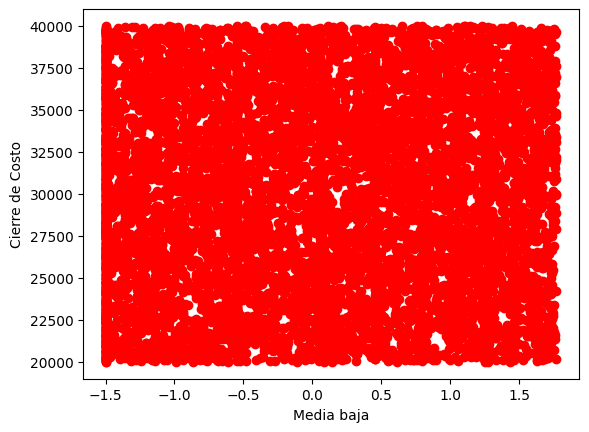

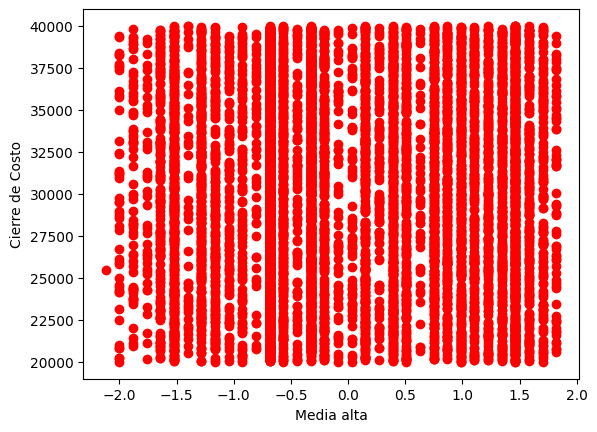

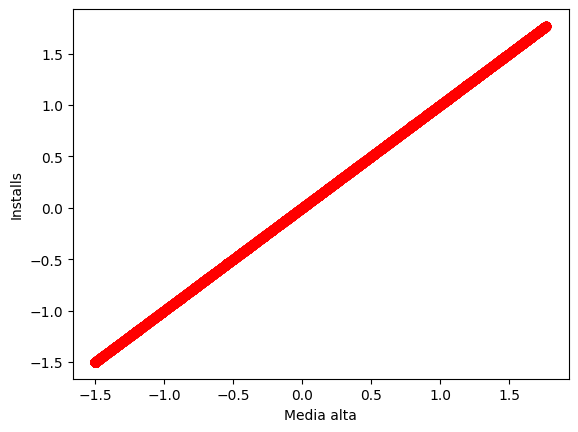

In [25]:
xlabel1 = 'Media baja'
xlabel2 = 'Media alta'
ylabel1 = 'Cierre de Costo'
ylabel2 = "Installs"

graficarDatos(X_norm.iloc[:, 2], y_train, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 1], y_train, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 2], X_norm.iloc[:, 2], xlabel2, ylabel2)

#### Una vez normalizados los datos incluimos la columna de unos (1) para una buena convergencia

In [19]:
# Añadimos el termino de intersección, agregamos la columna de unos para los tethas 0
# Columna de 1 para X0

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

#mostramos el resultado de X concatenado con X
X_ready[:10]

array([[ 1.        , -1.1676189 ,  1.22504358, -0.41079525,  1.03471414,
        -1.68792617, -0.00900919,  0.78968385,  1.1217093 , -1.24372969,
         0.62740784, -0.50288253],
       [ 1.        ,  0.00945714, -1.28483004,  0.26272263,  1.64088871,
        -0.13648613, -1.48556076, -1.15238931, -0.87652457, -0.33322435,
         1.56330691, -1.00014562],
       [ 1.        , -1.02008055,  1.70311474,  0.05565402, -0.92568023,
        -0.20700613,  0.915925  , -1.15238931,  1.51530082,  1.50261542,
        -1.231743  ,  1.48616983],
       [ 1.        ,  1.00596921,  0.14938346, -0.78951283, -1.22876752,
         0.63923389,  0.62340063,  0.01285459,  0.09231609,  0.33704995,
        -0.55195145,  1.48616983],
       [ 1.        ,  1.6488918 ,  0.38841904,  0.05565402, -1.22876752,
        -0.70064614, -0.22492003,  0.78968385,  0.21342118, -1.53437961,
        -1.10948591, -0.00561944],
       [ 1.        , -0.45720918, -1.52386562, -1.49899525,  1.42808275,
         1.1328739 , -

## Función del Costo

In [20]:
# inicializamos la funcion de costo
def calcularCosto(X, y, theta):
  # Inicializamos algunos valores utiles
  m = y.shape[0] # número de ejemplos de entrenamiento

  J = 0  # resultado del costo j(0)
  h = np.dot(X, theta) # hipotesis calculado por el producto

  J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

Realizamos algunas pruebas con la funcion de costo()

In [21]:
theta = np.array([1, 0.009457,	-1.284830,	0.262723,	1.640889,	-0.598888,	0.970007,	-0.457729,	-0.876525,	-0.333224,	1.563307,	-0.902593])

JJ = calcularCosto(X_ready, y_train, theta)
print(f"Cont theta: { theta } se obtiene un Cierre de precio: {JJ}")

Cont theta: [ 1.        0.009457 -1.28483   0.262723  1.640889 -0.598888  0.970007
 -0.457729 -0.876525 -0.333224  1.563307 -0.902593] se obtiene un Cierre de precio: 467249491.27762073


## Función de Descenso por el Gradiente

In [22]:
#funcion por el Descenso por el Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0] #33077 numero de ejemplos de entrenamiento
  theta = theta.copy() # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

  J_history = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(calcularCosto(X, y, theta))

  return theta, J_history

## **2.1 Seleccionando coheficientes de aprendizaje**

Los valores de theta calculados son: [ 2.98148602e+04  4.73437623e+01  9.81852290e+01  1.43863495e+02
  3.10647082e+01 -3.30424626e+00  1.51950419e+02 -6.74017879e+01
 -1.47887763e+02  2.77431015e+01 -1.82325336e+01 -9.92702445e+00]
****************************************************************************************************
Con un Cierre de Precio: 16753576.507828163
****************************************************************************************************


Text(0, 0.5, 'Cierre de costo J')

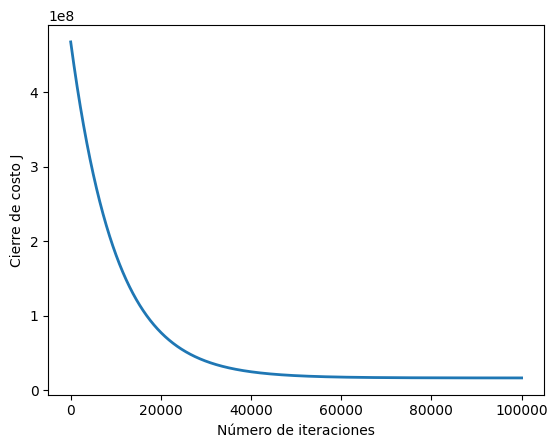

In [23]:
theta = np.zeros(12)

num_iter = 100000
alpha = 0.00005

theta, J_history = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_iter)
print(f"Los valores de theta calculados son: { theta }")
print("*" * 100)

# Calcular el costo
print(f"Con un Cierre de Precio: { J_history[-1] }")
print("*" * 100)

# Grafica de la convergencia del Cierre de Precio
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Cierre de costo J")

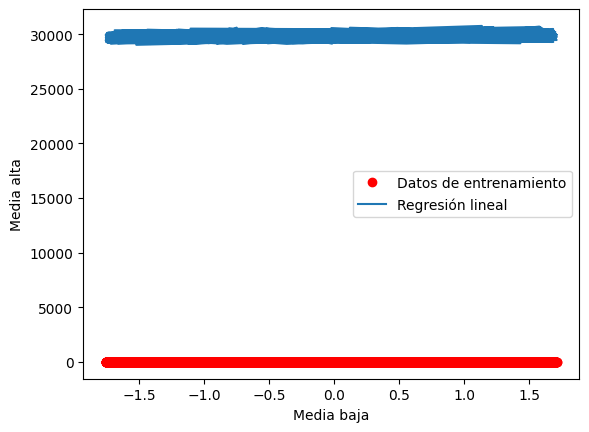

In [26]:
graficarDatos(X_ready[:, 1], X_ready[:, 11], xlabel1, xlabel2)

plt.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

plt.legend(['Datos de entrenamiento', 'Regresión lineal'])

Realizamos algunas pruebas

In [27]:
# Probamos algunas predicciones
p_array = np.dot([1, -1.167619,	1.225044,	-0.410795,	1.034714,	-0.122468,	-0.375102,	2.547134,	1.121709,	-1.243730,	0.627408,	0.886122], theta)
print("El valor predicho es: ", p_array)

El valor predicho es:  29404.00522675437


Viendo los resultados vemos que se aproximan los calculos de precios en ambos predicciones.

## 2.2 Prueba del Modelo

Realizaremos las pruebas con los datos del 20% que fueron reservados para la parte prueba

In [28]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

# Mostramos el X_test_norm
X_test_norm

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
3457,0.467508,0.986008,0.169542,0.131901,1.203394,1.498188,-1.540804,0.546460,-1.403884,-0.073463,-1.000146
3069,-0.105774,1.344561,0.500852,1.640889,0.427674,0.518928,-0.763975,1.151986,0.150204,1.563307,0.491644
9657,-0.441055,-0.209170,-0.941545,-0.725772,-1.335326,-0.708978,-0.763975,-0.059065,0.028605,-1.138996,-0.005619
10714,-0.066645,1.225044,1.243029,0.673589,-0.630126,-1.489740,-0.763975,1.121709,1.283145,0.427159,-1.497409
3963,0.678226,-0.209170,-1.015654,1.550607,1.414954,-1.675702,-0.763975,-0.059065,-0.030711,1.142785,0.988907
...,...,...,...,...,...,...,...,...,...,...,...
7448,-1.020798,-0.687241,-1.499540,-1.183627,1.273914,-1.663165,1.566513,-0.785696,0.411195,-1.231743,-1.000146
4584,-0.839517,-0.687241,-0.836376,0.312464,0.639234,0.816327,0.401269,1.000604,0.259939,-0.979851,-1.497409
5940,-1.753106,0.507937,-0.104552,-1.151384,-1.476366,-1.443075,0.789684,0.334526,0.182828,-1.231743,1.486170
6851,-1.282850,0.986008,0.055654,-0.216327,0.991834,0.282819,0.789684,0.546460,0.541691,-0.278981,-0.502883


In [29]:
# Concatenamos con la columna de ceros
X_test_ready = np.concatenate([X_test_norm, np.zeros((m_test, 1))], axis = 1)
# Mostramos los resultados
print(X_test_ready)

[[ 0.46750807  0.986008    0.16954175 ... -0.07346251 -1.00014562
   0.        ]
 [-0.10577354  1.34456137  0.50085152 ...  1.56330691  0.49164365
   0.        ]
 [-0.44105534 -0.20916992 -0.94154477 ... -1.13899625 -0.00561944
   0.        ]
 ...
 [-1.75310564  0.50793683 -0.10455169 ... -1.231743    1.48616983
   0.        ]
 [-1.28284958  0.986008    0.05565402 ... -0.27898089 -0.50288253
   0.        ]
 [ 1.37643047 -0.68724108 -1.33388528 ... -0.67420853  0.98890674
   0.        ]]


Realizamos los calculos de los Y predichas utilizando el modelo de regresion lineal entrenado: 
con los datos de prueba del 20%

In [30]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(np.dot(i, theta))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()
# Mostramos los resultados

In [31]:
X_columans = ['App',	'Category',	'Reviews',	'Size',	'Type',	'Price',	'Content_Rating',	'Genres',	'Last_Updated',	'Current_Ver',	'Android_Ver']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Installs'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([X_test, y_test, df_pred], axis = 1)
df_resultado.head(20)


,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs,y_predicha
0,6191,26,3063,227,42,14641,1,83,156,1212,9,38196,14006.280274
1,4594,29,3671,461,31,13235,3,103,680,2765,12,39371,2974.694107
2,3660,16,1024,94,6,11472,3,63,639,201,11,20642,13543.735350
3,4703,28,5033,311,16,10351,3,102,1062,1687,8,39502,2067.025142
4,6778,16,888,447,45,10084,3,63,619,2366,13,35858,20290.262878
5,3777,30,1,269,27,14613,2,109,549,699,9,25688,12146.621629
6,1573,12,4207,63,44,12197,6,52,1221,424,12,21619,35738.225394
7,1599,15,2444,461,25,14147,2,89,680,2571,14,39638,35243.831441
8,969,13,3378,461,21,12854,7,61,642,2765,9,31903,41533.794801
9,3063,30,3535,369,25,14187,6,109,330,309,12,34600,19216.411442


## 2.4 Validación

Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [32]:
# Creamos la function del error cuadratico medio
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta**2)
    return err_cuadrado / len(y_pred)

Realizamos el calculo del errorcuadratico medio

In [33]:
# Probando con el X_test que es el 20% de prueba
#haciendo x_test que es el 20% restante
m_ready = len(y_test)

#normalizamos los datos
X_test_normalizado = (X_test - mu) / sigma

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test_normalizado], axis=1)

# creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for i in X_ready_test:
    y_predicha.append(np.dot(i, theta))

mse = mean_squared_error(y_predicha, y_test.values)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 72897140010.00638
Raíz del Error Cuadrático Medio (RMSE) = 269994.70367028756


# 2.3 Ecuacion de la **Normal**

In [34]:
#Declaramos la funcion de la ecuacion normal para calcular thetas
def calcularThetaEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta


In [35]:
# Se debe agregar una columnas de unos 1 al dataset
X_rem = np.concatenate([np.ones((m, 1)), X_train], axis = 1)

In [36]:
theta_ = calcularThetaEcuacionNormal(X_rem, y_train)
print(f"Los valores de theta_ calculados son: { theta_ }")

Los valores de theta_ calculados son: [ 2.85717251e+04  1.70670562e-02  1.99531315e+01  7.87709720e-02
  2.10351742e-01 -2.80755518e-01  1.07299314e-01 -2.64791461e+01
 -6.55150724e+00  8.08190881e-02 -2.11583691e-02 -4.75119990e+00]


In [37]:
# Verificar pruebas del calculo
# Haciendo pruebas con valores
X_array = [1, 3860,	1,	46,	19,	5,	12161,	1,	9,	557,	280,	8]


price = np.dot(X_array, theta_)

print(f"Con los datos:{theta_} ")
print('La predicción de las aplicación de playstore con con los datos, usando la Ecuación Normal es: {:.2f} instaldos'.format(price))

Con los datos:[ 2.85717251e+04  1.70670562e-02  1.99531315e+01  7.87709720e-02
  2.10351742e-01 -2.80755518e-01  1.07299314e-01 -2.64791461e+01
 -6.55150724e+00  8.08190881e-02 -2.11583691e-02 -4.75119990e+00] 
La predicción de las aplicación de playstore con con los datos, usando la Ecuación Normal es: 29884.28 instaldos


## Conclusión


En conclusión de pudo realizar el modelo de regresión lineal multivariable para predecir aplicaciones de playstore en tanto a sus descargas, instalaciones, calificación y precio. Donde los cantidades de descargas de las aplicaciónes fueron probados tanto con los datos de entrenamiento y de prueba.

## ============================================================================================

# 2. Regresión Lineal Multivariable con Regularización

In [38]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


In [39]:
data_reg = df

# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(data_reg, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test_reg y y_test_reg donde seran los datos para el prueba
X_test_reg = test_data.iloc[:, :11]
y_test_reg = test_data.iloc[:, 11]

# Dividimos los datos para X_train_reg y y_train_reg donde seran los datos para el entrenamiento
X_train_reg = train_data.iloc[:, :11]
y_train_reg = train_data.iloc[:, 11]
m = y_train_reg.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train_reg:")
print(X_train_reg)
print('-' * 100)
print("Datos de y_train_reg:")
print(y_train_reg)

# Mostramos la cantidad de ejemplos que tienen X_train_reg y y_train_reg
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train_reg:
       App  Category  Reviews  Size  Type  Price  Content_Rating  Genres  \
6762  1636        28     1998   367     1  12477               7     102   
401   4915         7     3234   461    23  10357               2      36   
7420  2047        32     2854    63    22  13805               2     115   
1631  7691        19     1303    16    34  13385               5      68   
6475  9482        21     2854    16    15  12167               7      72   
...    ...       ...      ...   ...   ...    ...             ...     ...   
5734  6646        24        0   461    37  12303               6      81   
5191  4074        26     2418   416    39  12235               2      83   
5390  2733         5     2203    94     8  12630               9      22   
860   6254        10      248   171    23  10724               6      52   
7270  1989        16     3588    28    28  11793               1      63   

      Last_Updated  Current_Ver  Android_Ver  
6762           210

In [40]:
# Normalizamos los features X
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # X.shape[1] = 17 columnas de 0 para el promedio
  sigma = np.zeros(X.shape[1]) # columnas de 0 para desviación estandar

  mu = np.mean(X, axis = 0) # calculamos el promedio de las caracteristicas, la media
  sigma = np.std(X, axis = 0) #std calcular la desviacion estandar
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [41]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm_reg, mu_reg, sigma_reg = featureNormalize(X_train_reg)

# Mostramos los datos normalizados
X_norm_reg

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
6762,-1.167619,1.225044,-0.410795,1.034714,-1.687926,-0.009009,0.789684,1.121709,-1.243730,0.627408,-0.502883
401,0.009457,-1.284830,0.262723,1.640889,-0.136486,-1.485561,-1.152389,-0.876525,-0.333224,1.563307,-1.000146
7420,-1.020081,1.703115,0.055654,-0.925680,-0.207006,0.915925,-1.152389,1.515301,1.502615,-1.231743,1.486170
1631,1.005969,0.149383,-0.789513,-1.228768,0.639234,0.623401,0.012855,0.092316,0.337050,-0.551951,1.486170
6475,1.648892,0.388419,0.055654,-1.228768,-0.700646,-0.224920,0.789684,0.213421,-1.534380,-1.109486,-0.005619
...,...,...,...,...,...,...,...,...,...,...,...
5734,0.630841,0.746972,-1.499540,1.640889,0.850794,-0.130198,0.401269,0.485908,0.695914,1.563307,0.491644
5191,-0.292440,0.986008,-0.181930,1.350699,0.991834,-0.177559,-1.152389,0.546460,-1.243730,-0.360134,0.491644
5390,-0.773824,-1.523866,-0.299087,-0.725772,-1.194286,0.097553,1.566513,-1.300392,1.028085,1.313523,1.486170
860,0.490123,-0.926277,-1.364401,-0.229224,-0.136486,-1.229950,0.401269,-0.392104,-1.632252,-0.206259,0.491644


In [42]:
# Añadimos el termino de intersección, agregamos la columna de unos para los tethas 0
# Columna de 1 para X0

X_ready_reg = np.concatenate([np.ones((m, 1)), X_norm_reg], axis=1)

#mostramos el resultado de X concatenado con X
X_ready_reg[:10]

array([[ 1.        , -1.1676189 ,  1.22504358, -0.41079525,  1.03471414,
        -1.68792617, -0.00900919,  0.78968385,  1.1217093 , -1.24372969,
         0.62740784, -0.50288253],
       [ 1.        ,  0.00945714, -1.28483004,  0.26272263,  1.64088871,
        -0.13648613, -1.48556076, -1.15238931, -0.87652457, -0.33322435,
         1.56330691, -1.00014562],
       [ 1.        , -1.02008055,  1.70311474,  0.05565402, -0.92568023,
        -0.20700613,  0.915925  , -1.15238931,  1.51530082,  1.50261542,
        -1.231743  ,  1.48616983],
       [ 1.        ,  1.00596921,  0.14938346, -0.78951283, -1.22876752,
         0.63923389,  0.62340063,  0.01285459,  0.09231609,  0.33704995,
        -0.55195145,  1.48616983],
       [ 1.        ,  1.6488918 ,  0.38841904,  0.05565402, -1.22876752,
        -0.70064614, -0.22492003,  0.78968385,  0.21342118, -1.53437961,
        -1.10948591, -0.00561944],
       [ 1.        , -0.45720918, -1.52386562, -1.49899525,  1.42808275,
         1.1328739 , -

# 2.2 Descenso por el Gradiente

### Aplicamos y calculamos la Función de Costo

In [43]:
def calcularCostoReg(X, y, theta, lambda_reg):
    m = y.shape[0]
    h = np.dot(X, theta)
    
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_reg  * np.sum(np.square(theta[1:])))
    return J

Realizamos algunas pruebas con la funcion de costo()

In [44]:
theta = np.array([1, 0.009457,	-1.284830,	0.262723,	1.640889,	-0.598888,	0.970007,	-0.457729,	-0.876525,	-0.333224,	1.563307,	-0.902593])

JJ = calcularCosto(X_ready, y_train, theta)
print(f"Cont theta: { theta } se obtiene un Costo de: {JJ}")

Cont theta: [ 1.        0.009457 -1.28483   0.262723  1.640889 -0.598888  0.970007
 -0.457729 -0.876525 -0.333224  1.563307 -0.902593] se obtiene un Cierre de precio: 467249491.27762073


## Función de Descenso por el Gradiente

In [45]:
def calcularDescensoGradienteReg(X, y, theta, alpha, num_iters, lambda_reg):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = np.dot(X, theta)
        # theta[0] = theta[0] - (alpha / m) * np.sum(h - y) # .dot(X)
        theta[0] = theta[0] - (alpha / m) * np.sum(np.dot((h - y), X[:, 0]))
        theta[1:] = theta[1:] * (1 - (alpha * lambda_reg) / m) - (alpha / m) * np.dot((h - y), X[:, 1:])
        J_history.append(calcularCostoReg(X, y, theta, lambda_reg))
        
    return theta, J_history


## 3.2.1 Seleccionando coheficientes de aprendizaje

Los valores de theta calculados son: [ 3.00157264e+04  4.75722652e+01  1.42422812e+02  1.44720804e+02
  3.24850697e+01 -3.76911339e+00  1.53706507e+02 -6.80658365e+01
 -1.91888613e+02  2.74314630e+01 -1.99713419e+01 -9.72302068e+00]
****************************************************************************************************
Con un Cierre de Precio: 16733388.539289452
****************************************************************************************************


Text(0, 0.5, 'Cierre de costo J')

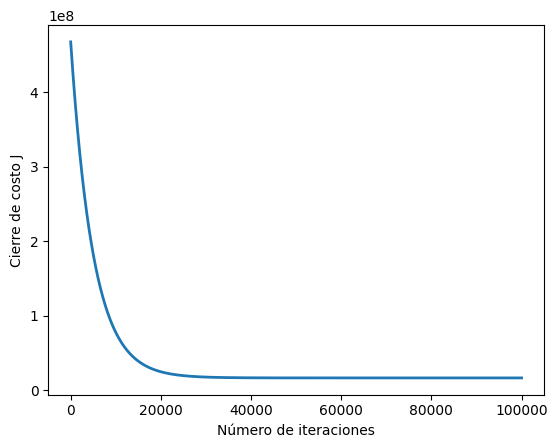

In [48]:
theta_reg = np.zeros(12)
lambda_reg = 0.01

num_iter = 100000
alpha_reg = 0.0001

theta_reg, J_history_reg = calcularDescensoGradienteReg(X_ready_reg, y_train_reg, theta_reg, alpha_reg, num_iter, lambda_reg)
print(f"Los valores de theta calculados son: { theta_reg }")
print("*" * 100)

print(f"Con el Costo: { J_history_reg[-1] }")
print("*" * 100)

# Grafica de la convergencia del Cierre de Precio
plt.plot(np.arange(len(J_history_reg)), J_history_reg, lw=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Cierre de costo J")


In [50]:
# Probamos algunas predicciones
p_array = np.dot([1, -1.167619,	1.225044,	-0.410795,	1.034714,	-0.122468,	-0.375102,	2.547134,	1.121709,	-1.243730,	0.627408,	0.886122], theta_reg)
print("El valor predicho es: ", p_array)

El valor predicho es:  29607.74314829801


## Prueba con los datos 

In [51]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm_reg = (X_test_reg - mu_reg) / sigma_reg
m_test = len(X_test_reg)

# Mostramos el X_test_norm_reg
X_test_norm_reg

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
3457,0.467508,0.986008,0.169542,0.131901,1.203394,1.498188,-1.540804,0.546460,-1.403884,-0.073463,-1.000146
3069,-0.105774,1.344561,0.500852,1.640889,0.427674,0.518928,-0.763975,1.151986,0.150204,1.563307,0.491644
9657,-0.441055,-0.209170,-0.941545,-0.725772,-1.335326,-0.708978,-0.763975,-0.059065,0.028605,-1.138996,-0.005619
10714,-0.066645,1.225044,1.243029,0.673589,-0.630126,-1.489740,-0.763975,1.121709,1.283145,0.427159,-1.497409
3963,0.678226,-0.209170,-1.015654,1.550607,1.414954,-1.675702,-0.763975,-0.059065,-0.030711,1.142785,0.988907
...,...,...,...,...,...,...,...,...,...,...,...
7448,-1.020798,-0.687241,-1.499540,-1.183627,1.273914,-1.663165,1.566513,-0.785696,0.411195,-1.231743,-1.000146
4584,-0.839517,-0.687241,-0.836376,0.312464,0.639234,0.816327,0.401269,1.000604,0.259939,-0.979851,-1.497409
5940,-1.753106,0.507937,-0.104552,-1.151384,-1.476366,-1.443075,0.789684,0.334526,0.182828,-1.231743,1.486170
6851,-1.282850,0.986008,0.055654,-0.216327,0.991834,0.282819,0.789684,0.546460,0.541691,-0.278981,-0.502883


In [52]:
# Concatenamos con la columna de ceros
X_test_ready_reg = np.concatenate([X_test_norm_reg, np.zeros((m_test, 1))], axis = 1)
# Mostramos los resultados
print(X_test_ready_reg)

[[ 0.46750807  0.986008    0.16954175 ... -0.07346251 -1.00014562
   0.        ]
 [-0.10577354  1.34456137  0.50085152 ...  1.56330691  0.49164365
   0.        ]
 [-0.44105534 -0.20916992 -0.94154477 ... -1.13899625 -0.00561944
   0.        ]
 ...
 [-1.75310564  0.50793683 -0.10455169 ... -1.231743    1.48616983
   0.        ]
 [-1.28284958  0.986008    0.05565402 ... -0.27898089 -0.50288253
   0.        ]
 [ 1.37643047 -0.68724108 -1.33388528 ... -0.67420853  0.98890674
   0.        ]]


In [53]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha_reg = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready_reg:
  y_predicha_reg.append(np.dot(i, theta_reg))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha_reg = np.array(y_predicha_reg)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha_reg, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [54]:
X_columans = ['App',	'Category',	'Reviews',	'Size',	'Type',	'Price',	'Content_Rating',	'Genres',	'Last_Updated',	'Current_Ver',	'Android_Ver']

X_test_reg = np.array(X_test_reg)
X_test_reg = pd.DataFrame(X_test_reg, columns = X_columans)

y_test_reg = np.array(y_test_reg)
y_test_reg = pd.DataFrame(y_test_reg, columns = ['Installs'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test_reg y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([X_test_reg, y_test_reg, df_pred], axis = 1)
df_resultado.head(20)

,App,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs,y_predicha
0,6191,26,3063,227,42,14641,1,83,156,1212,9,38196,14169.503503
1,4594,29,3671,461,31,13235,3,103,680,2765,12,39371,2981.761497
2,3660,16,1024,94,6,11472,3,63,639,201,11,20642,13678.413496
3,4703,28,5033,311,16,10351,3,102,1062,1687,8,39502,2080.843784
4,6778,16,888,447,45,10084,3,63,619,2366,13,35858,20383.609014
5,3777,30,1,269,27,14613,2,109,549,699,9,25688,12283.383703
6,1573,12,4207,63,44,12197,6,52,1221,424,12,21619,36017.989064
7,1599,15,2444,461,25,14147,2,89,680,2571,14,39638,35499.778211
8,969,13,3378,461,21,12854,7,61,642,2765,9,31903,41799.498155
9,3063,30,3535,369,25,14187,6,109,330,309,12,34600,19290.134909


## 2.4 Validación 

In [55]:
# Creamos la function del error cuadratico medio
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta**2)
    return err_cuadrado / len(y_pred)

In [56]:
# Probando con el X_test que es el 20% de prueba
#haciendo x_test que es el 20% restante
m_ready = len(y_test_reg)

#normalizamos los datos
X_test_normalizado_reg = (X_test_reg - mu_reg) / sigma_reg

#Concatenamos de unos a la primera posicion del X_test_reg
X_ready_test_reg = np.concatenate([np.ones((m_ready, 1)), X_test_normalizado_reg], axis=1)

# creamos un array que almacenara cada una de las y_predicha
y_predicha = []

for i in X_ready_test_reg:
    y_predicha.append(np.dot(i, theta_reg))

mse = mean_squared_error(y_predicha, y_test_reg.values)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 72802914067.83598
Raíz del Error Cuadrático Medio (RMSE) = 269820.1513375826


## =================================================================================================================

# Ecuación de la Normal con Regularización 

In [57]:

def calcularThetaEcuacionNormalReg(X, y, lambda_reg):
    m = y.shape[0]
    n = X.shape[1]
    
    # theta = np.zeros(X.shape[1])
    
    # Construimos la matriz L
    L = np.eye(n)
    L[0, 0] = 0
    
    # Aplicamos la ecuación normal regularizada
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_reg * L), X.T), y)
    
    return theta

In [58]:
# Se debe agregar una columnas de unos 1 al dataset
X_rem_reg = np.concatenate([np.ones((m, 1)), X_train_reg], axis = 1)

In [59]:
# Suponiendo que X_rem y y_train ya están preparados
lambda_reg = 0.1  # Valor de lambda para la regularización
theta_enor_reg = calcularThetaEcuacionNormalReg(X_rem_reg, y_train_reg, lambda_reg)
print(f"Los valores de theta calculados con regularización son: {theta_enor_reg}")

Los valores de theta calculados con regularización son: [ 2.85717248e+04  1.70670557e-02  1.99531220e+01  7.87709731e-02
  2.10351745e-01 -2.80755515e-01  1.07299312e-01 -2.64790999e+01
 -6.55150523e+00  8.08190953e-02 -2.11583672e-02 -4.75118676e+00]


In [60]:
# Verificar pruebas del calculo
# Haciendo pruebas con valores
X_array = [1, 3860,	1,	46,	19,	5,	12161,	1,	9,	557,	280,	8]


price = np.dot(X_array, theta_enor_reg)

print(f"Con los datos:{theta_enor_reg} ")
print('La predicción de las aplicación de playstore con con los datos, usando la Ecuación Normal es: {:.2f} instaldos'.format(price))

Con los datos:[ 2.85717248e+04  1.70670557e-02  1.99531220e+01  7.87709731e-02
  2.10351745e-01 -2.80755515e-01  1.07299312e-01 -2.64790999e+01
 -6.55150523e+00  8.08190953e-02 -2.11583672e-02 -4.75118676e+00] 
La predicción de las aplicación de playstore con con los datos, usando la Ecuación Normal es: 29884.28 instaldos


# Conclusión

## Resultados 


En cuanto a los resultados del modelo de regresión lineal mutlivariable tanto al aplicar con Regularización y sin regularización se obtuvo resultados como que no tan buenas porque en los datos de entrenamiento se calculo casi el mismo valor del costo tanto para el Sin regularización y con regularizacion.

Tambien se analizó los hiperparámetros donde si varian un poco, y los mejores hiperparámetros fueron en la segundo modelo con regularización, porque se calculó un costo con un poco de diferencia. 